In [13]:
import torch
from torch import atan
from torch.autograd import grad
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.misc import derivative

from sympy import *
import sympy as sp
from scipy.special import roots_legendre
from Func import *


In [14]:
x = symbols('x')
fx = x * (1 - x) * sp.exp(x)
dfdx = diff(fx, x)

df2d2x = diff(diff(fx, x), x)
ceiling(df2d2x)


ceiling(x*(1 - x)*exp(x) - 2*x*exp(x) + 2*(1 - x)*exp(x) - 2*exp(x))

In [15]:
# 有限元分析的数学建模page 21
# def error(u, un):
#   x = symbols('x')
#   du = diff(u, x)
#   B = G_integrate(du**2+u**2, x)
#   A = (1/2*B)**0.5
#   dun = diff(un, x)
#   Bn = G_integrate(dun**2+(un)**2, x)
#   Aup = (0.5*B-0.5*Bn)**0.5

#   return float((Aup.evalf()/A.evalf()))
# def cal_U(u):
#   x = symbols('x')
#   du = diff(u, x)
#   B = integrate(du**2+u**2, (x, 0, 1))
#   B = G_integrate(du**2+u**2, x)
#   U = (1/2*B)**0.5
#   return U.evalf()
  

def u(x):
    return -2*E/(E**2-1)*sinh(x)+x

def uh(x):
  return 0.14588*x*(1-x) + 0.16279*x**2*(1-x)

#print(error(u(x), uh(x)))
print(cal_U(u(x)-uh(x))/cal_U(u(x)))
print(error(u(x), uh(x)))

0.00199141226604224
0.00199141226604224


In [16]:
def l2_error_quadratic(n, x, u, exact):

  # *****************************************************************************80
  #
  # l2_error_quadratic() estimates the L2 error norm of a finite element solution.
  #
  #  Discussion:
  #
  #    We assume the finite element method has been used, over an interval [A,B]
  #    involving N nodes, with piecewise quadratic elements used for the basis.
  #    The coefficients U(1:N) have been computed, and a formula for the
  #    exact solution is known.
  #
  #    This function estimates the L2 norm of the error:
  #
  #      L2_NORM = Integral ( A <= X <= B ) ( U(X) - EXACT(X) )^2 dX
  #
  #  Licensing:
  #
  #    This code is distributed under the GNU LGPL license.
  #
  #  Modified:
  #
  #    12 July 2015
  #
  #  Author:
  #
  #    John Burkardt
  #
  #  Input:
  #
  #    integer N, the number of nodes.
  #
  #    real X(N), the mesh points.
  #
  #    real U(N), the finite element coefficients.
  #
  #    function EQ = EXACT ( X ), returns the value of the exact
  #    solution at the point X.
  #
  #  Output:
  #
  #    real E2, the estimated L2 norm of the error.
  #

    e2 = 0.0
  #
  #  Define a 2 point Gauss-Legendre quadrature rule on [-1,+1].
  #
    quad_num = 2
    abscissa = np.array([-0.577350269189625764509148780502,
                         +0.577350269189625764509148780502])
    weight = np.array([1.0, 1.0])
  #
  #  Integrate over each interval.
  #
    e_num = (n - 1) // 2

    for e in range(0, e_num):

        l = 2 * e
        xl = x[l]
        ul = u[l]

        m = 2 * e + 1
        xm = x[m]
        um = u[m]

        r = 2 * e + 2
        xr = x[r]
        ur = u[r]

        for q in range(0, quad_num):

            xq = ((1.0 - abscissa[q]) * xl
                  + (1.0 + abscissa[q]) * xr) \
                / 2.0

            wq = weight[q] * (xr - xl) / 2.0

            vl = ((xq - xm) / (xl - xm)) \
                * ((xq - xr) / (xl - xr))

            vm = ((xq - xl) / (xm - xl)) \
                * ((xq - xr) / (xm - xr))

            vr = ((xq - xl) / (xr - xl)) \
                * ((xq - xm) / (xr - xm))

            uq = u[l] * vl + u[m] * vm + u[r] * vr

            eq = exact(xq)

            e2 = e2 + wq * (uq - eq) ** 2

    e2 = np.sqrt(e2)

    return e2


x_n = 3

x_lo = 0.0
x_hi = np.pi
x = np.linspace(x_lo, x_hi, x_n)

# U is an approximation to sin(x).

u = np.zeros(x_n)
for i in range(0, x_n):
    u[i] = np.sin(x[i])

e1 = l2_error_quadratic(x_n, x, u, np.sin)

print('  %2d  %g' % (x_n, e1))


   3  0.0894667


(1 - x)*(atan(0.5*x - 0.4) + 0.380506377112365)
(1 - x)*(atan(50*x - 40.0) + 1.54580153317598)
0.5*(1 - x)/(0.25*(x - 0.8)**2 + 1) - atan(0.5*x - 0.4) - 0.380506377112365
0.43103448275862055
50*(1 - x)/(2500*(x - 0.8)**2 + 1) - atan(50*x - 40.0) - 1.54580153317598
0.03123048094940306


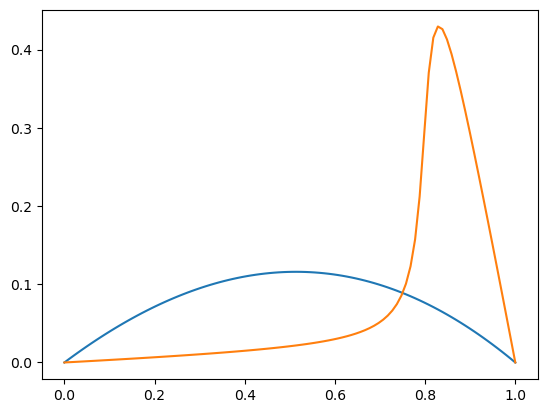

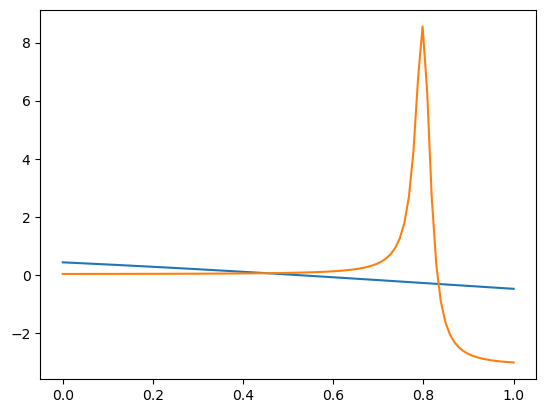

In [17]:
def f(x, a, xb=0.8):
    return (1 - x) * (sp.atan(a * (x - xb)) + sp.atan(a*xb))
def d2f(x, a, xb=0.8):
    b = x-xb
    return -2*(a+a**3*b*(b-x+1))/(a**2*b**2+1)*2

x = symbols('x')
x_data = np.linspace(0, 1, 100)
a = [0.5, 50]
xb = 0.8

for i in a:
    f_ = f(x, i)
    f_func = lambdify(x, f_)
    print(f_)
    #plt.figure()
    plt.plot(x_data, f_func(x_data))

plt.figure()
for i in a:
    df_ = diff(f(x, i), x)
    df_func = lambdify(x, df_)
    print(df_)

    plt.plot(x_data, df_func(x_data))
    print(df_func(0))



In [18]:
N = 3  # 取3个样本点
a = 0  # 积分上下限
b = 1
x, w = roots_legendre(N)
print(x, w)
print(5/9)

[-0.77459667  0.          0.77459667] [0.55555556 0.88888889 0.55555556]
0.5555555555555556


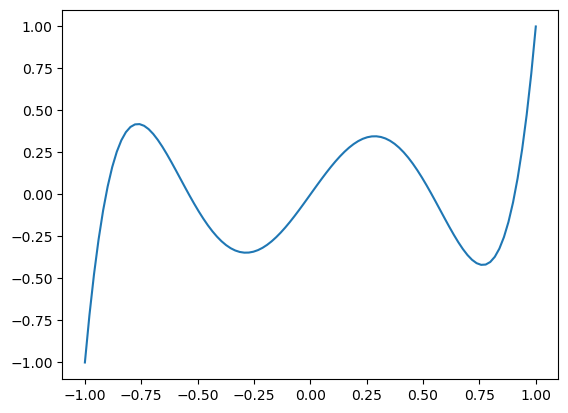

In [19]:
x = symbols("x")


def P(point):
  if point == 0:
      return 1
  elif point == 1:
      return x
  p0 = 1
  p1 = x
  for i in range(point - 1):
      temp = ((2 * i + 3) * x * p1 - (i + 1) * p0) / (i + 2)
      p0 = p1
      p1 = temp
  return p1


for i in range(5,6):
    x_data = np.linspace(-1, 1, 100)
    P_func=lambdify(x, P(i))
    plt.plot(x_data, P_func(x_data))


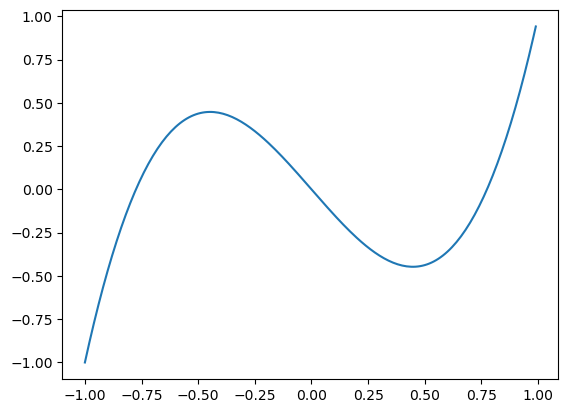

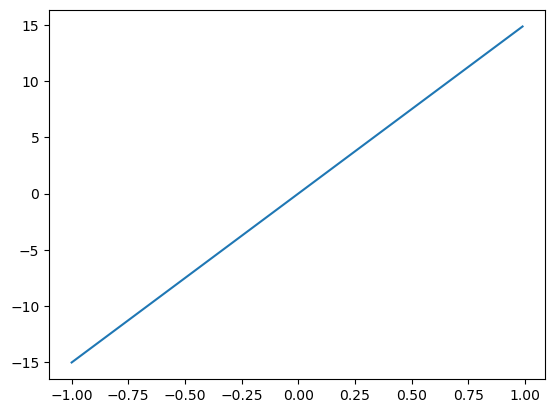

In [20]:
from sympy import *
import matplotlib.pyplot as plt

x=symbols("x")
#legendre的n阶多项式
def legendre_polynomial(n):
    '''
    :param n: legendre多项式项数
    :return: legendre的n项展开
    '''

    P = [1, x]
    for i in range(1,n):
        m=(2*i+1)/(i+1)*x*P[i]-i/(i+1)*P[i-1]
        P.append(m)
    return P[n]
P_n=legendre_polynomial(3)
x1=[]
y1=[]
for i in range(200):
    x1.append(-1+0.01*i)
for i in x1:
    y1.append(P_n.subs('x',i))

plt.plot(x1,y1)
plt.show()
#legendre的n阶多项式的m次导数
def Derivation(function,m):   #多阶求导
    """
    :param function : 待求导数的函数
    :param m: 求导阶数
    :return: legendre的n阶多项式的m次导数
    """
    for i in range(m):  #逐次求导  ，共m次
        f = diff(function, x, m)
    return f

der=Derivation(P_n,2)

y_value=[]
for i in x1:
    y_value.append(der.subs('x',i))

plt.plot(x1,y_value)
plt.show()